In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np

In [3]:
bs = 16

In [4]:
path = untar_data(URLs.MNIST); path

PosixPath('/home/dennis/.fastai/data/mnist_png')

In [5]:
path.ls

<bound method <lambda> of PosixPath('/home/dennis/.fastai/data/mnist_png')>

In [24]:
path.ls()
path_training = path / 'training'

In [8]:
path_training.ls()

[PosixPath('/home/dennis/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/1'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/6')]

In [25]:
(path_training / '1').ls()[1:5]

[PosixPath('/home/dennis/.fastai/data/mnist_png/training/1/553.png'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/1/22303.png'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/1/36625.png'),
 PosixPath('/home/dennis/.fastai/data/mnist_png/training/1/18072.png')]

In [12]:
np.random.seed(2)

In [20]:
tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path / 'training', ds_tfms=tfms, size=26)

In [35]:
fnames = ImageList.from_folder(path_training, recurse=True)
fnames[:5]
import fastai.core
help(fastai.core.ItemBase)

Help on class ItemBase in module fastai.core:

class ItemBase(builtins.object)
 |  ItemBase(data: Any)
 |  
 |  Base item type in the fastai library.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data: Any)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  apply_tfms(self, tfms: Collection, **kwargs)
 |      Subclass this method if you want to apply data augmentation with `tfms` to this `ItemBase`.
 |  
 |  show(self, ax: matplotlib.axes._axes.Axes, **kwargs)
 |      Subclass this method if you want to customize the way this `ItemBase` is shown on `ax`.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [53]:
nested_paths = [(path_training / str(num)).ls() for num in range(0, 10)];
import itertools
fnames = list(itertools.chain.from_iterable(nested_paths)) 
print(fnames[0])
len(fnames)

/home/dennis/.fastai/data/mnist_png/training/0/26210.png


60000

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

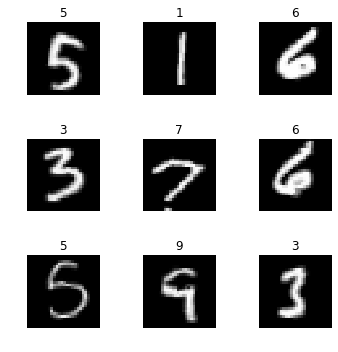

In [57]:
pat = r"/(\d)/\d+\.png$"
data = ImageDataBunch.from_name_re(path_training, fnames, pat=pat, ds_tfms=tfms)
data.show_batch(rows=3, figsize=(5,5))
data.classes

In [81]:
help(create_cnn)

Help on function create_cnn in module fastai.vision.learner:

create_cnn(data: fastai.basic_data.DataBunch, arch: Callable, cut: Union[int, Callable] = None, pretrained: bool = True, lin_ftrs: Union[Collection[int], NoneType] = None, ps: Union[float, Collection[float]] = 0.5, custom_head: Union[torch.nn.modules.module.Module, NoneType] = None, split_on: Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType] = None, bn_final: bool = False, **learn_kwargs: Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [76]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [77]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
1,0.288392,0.225306,0.069833,01:01
2,0.174052,0.095686,0.024333,01:01
3,0.078145,0.035415,0.009833,01:01
4,0.039233,0.026840,0.007833,01:02


In [82]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/dennis/.fastai/data/mnist_png/training;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,6,2,0,2
Path: /home/dennis/.fastai/data/mnist_png/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [64]:
learn.save('stage-1')

In [74]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (48000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
0,0,0,0,0
Path: /home/dennis/.fastai/data/mnist_png/training;

Valid: LabelList (12000 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,6,2,0,2
Path: /home/dennis/.fastai/data/mnist_png/training;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [78]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

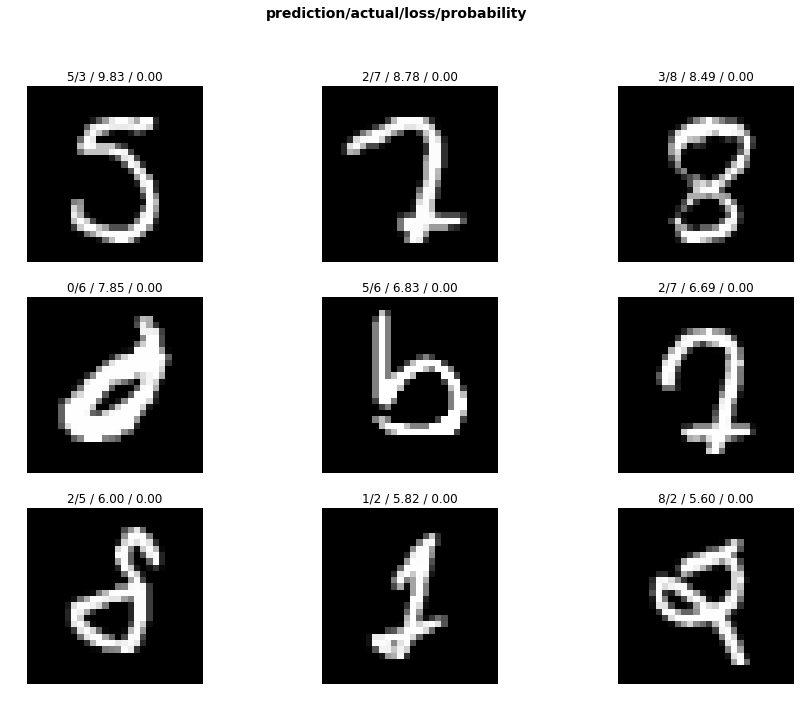

In [79]:
interp.plot_top_losses(9, figsize=(15,11))

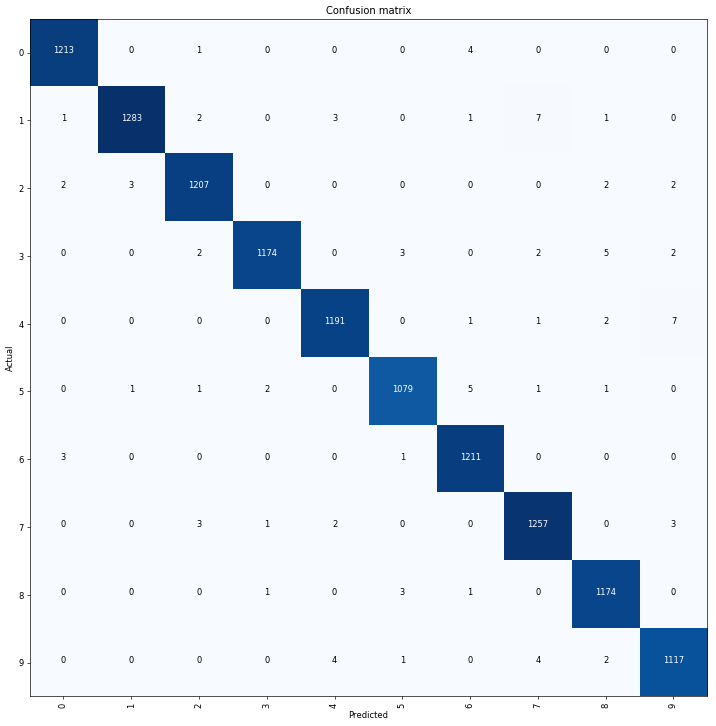

In [80]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [63]:
interp.most_confused(min_val=10)

[('5', '3', 43),
 ('7', '9', 33),
 ('4', '9', 28),
 ('2', '8', 24),
 ('5', '8', 24),
 ('9', '8', 18),
 ('7', '4', 15),
 ('3', '8', 13),
 ('9', '3', 13),
 ('4', '7', 11),
 ('5', '2', 10),
 ('7', '8', 10),
 ('9', '7', 10)]

In [65]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


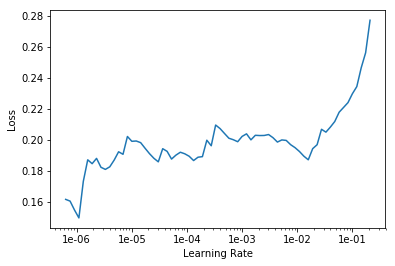

In [66]:
learn.recorder.plot()

In [67]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(1e-6,1e-2))

epoch,train_loss,valid_loss,error_rate,time
1,0.171118,0.128026,0.037500,01:02
2,0.108458,0.056109,0.016917,01:01
3,0.069465,0.043031,0.013000,01:02
4,0.040819,0.032781,0.010250,01:02


In [73]:
learn.save('stage-2')

In [71]:
interp = ClassificationInterpretation.from_learner(learn)

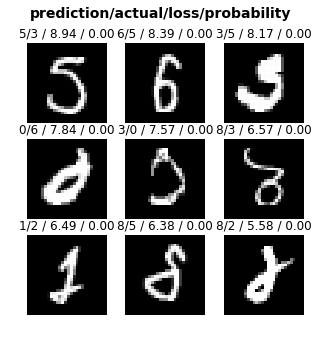

In [72]:
interp.plot_top_losses(9, figsize=(5,5))